## Problem and Data Analysis ##
Problem: To create 2 machine learning models to identify between malicious and non-malicious network connections in the NSL-KDD dataset

Models chosen: RandomForestClassifier, KNeighboursClassifier

RandomForest was chosen for its ease of implementation.

KNeighbours was chosen for its ease of hyperparameter tuning.

Model architecture, types of functions and parameters associated:

RandomForestClassifier:
RandomForestClassifier creates multiple decisions trees when training, and outputs the class that is the mode of the classes or the mean predicition of the individual trees.
The following are functions and parameters associated with RandomForest:
1. fit() - trains the classifer on the dataset
2. predict() - predicts the class labels for the data
3. predict_proba() - predicts the probability for the test data
4. score() - returns the mean accuracy on the fiven test data and labels
5. feature_importances_ - Returns feature importances. The higher the number, the more important the feature
6. Decision_path() - Returns the decision path in the forest

The following are parameters associated with RandomForest:
- n_estimators - the number of trees in the forest
- criterion - measures the quality of a split
- max_depth - the maximum depth of the tree. 
- min_samples_split - the minimum number of samples required to split an internal node
- min_samples_leaf - the minimum number of samples required to be at a leaf node
- min_weight_fraction_leaf - the minimum weighted fraction of the sum total of weights (of all input samples) required to be at a leaf node
- max_features - The number of features to consider when looking for the best split
- max_leaf_nodes - grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity.
- min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value
- bootstrap - Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree
- oob_score - Whether to use out-of-bag samples to estimate the generalisation score. By default, accuracy_score is used.
- n_jobs - The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees.
- random_state - Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node
- verbose - controls the verbosity when fitting and predicting
- warm_start - when set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise just fit a whole new forest
- class_weight - weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one
- ccp_alpha - complexity parameter used for Minimal Cost-Complexity Pruning. the subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen
- max_samples - if bootstrap is True, the number of samples to draw from X to train each base estimator
- monotonic_cst - indicates the monotonicity constraint to enforce on each feature

KNeighborsClassifier:
KNeighborsClassifier works by predicting the label of a data point by looking at the "K" closest labeled data points, and taking a majority vote or weighted average of their labels. 
The following are functions and parameters associated with KNeighbors:
1. fit() - trains the classifer on the dataset
2. predict() - predicts the class labels for the data
3. predict_proba() - predicts the probability for the test data
4. score() - returns the mean accuracy on the fiven test data and labels
5. kneighbors(n_neighbors, weights, algorithm, leaf_size, p, metric, metric_params, n_jobs) - The K-Neighbours algorithm function. 

The parameters for KNeighbours are as follows:
- n_neighbors - number of neighbors to use for kneighbors queries
- weights - how much weight should each neighbour have for prediction
- algorithm - algorithm used to compute the nearest neighbours. This can be set to 'auto', 'ball_tree', 'kd_tree', 'brute'
- leaf_size - Leaf size given to ball_tree or kd_tree
- metric - The distance metric to use for the tree. 
- n_jobs - Number of parallel jobs to run for neighbors search. No value means default of 1, -1 uses all processors



Design: This program trains machine learning models with the provided NSL-KDD training data set "KDDTrain+.txt". For model training, the file "KDDTest+.txt" was used. Pre-processing performed on raw data achieves the following:
- X axis: Object data types within the data(excluding the "attack" column which is used for the Y axis) such as "protocol_type", "service" and "flag" are converted into numerical values to improve accuracy of the machine learning model. The resulting data frame is then scaled accordingly
- Y axis: The "attack" column is taken as boolean to identify whether an attack is either malicious or non-malicious. 

These were chosen so as to allow the models to predict whether a connection was malicious or not based purely on raw data. 

Training:
The models are trained using the variables "x_train","y_train". These are fitted to the models. After initial training, the models were subject to hyperparameter adjustment/tuning to increase their accuracy on the test data. 


## Importing the data ##
The data is imported under the created column names

In [14]:
%pip install matplotlib
%pip install seaborn
%pip install numpy
%pip install scikit-learn
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
column_names = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level']) 
data = pd.read_csv("KDDTrain.txt", names=column_names)
data

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


## Data Exploration ##
Using the below code, it is possible to output the distribution of different attack types

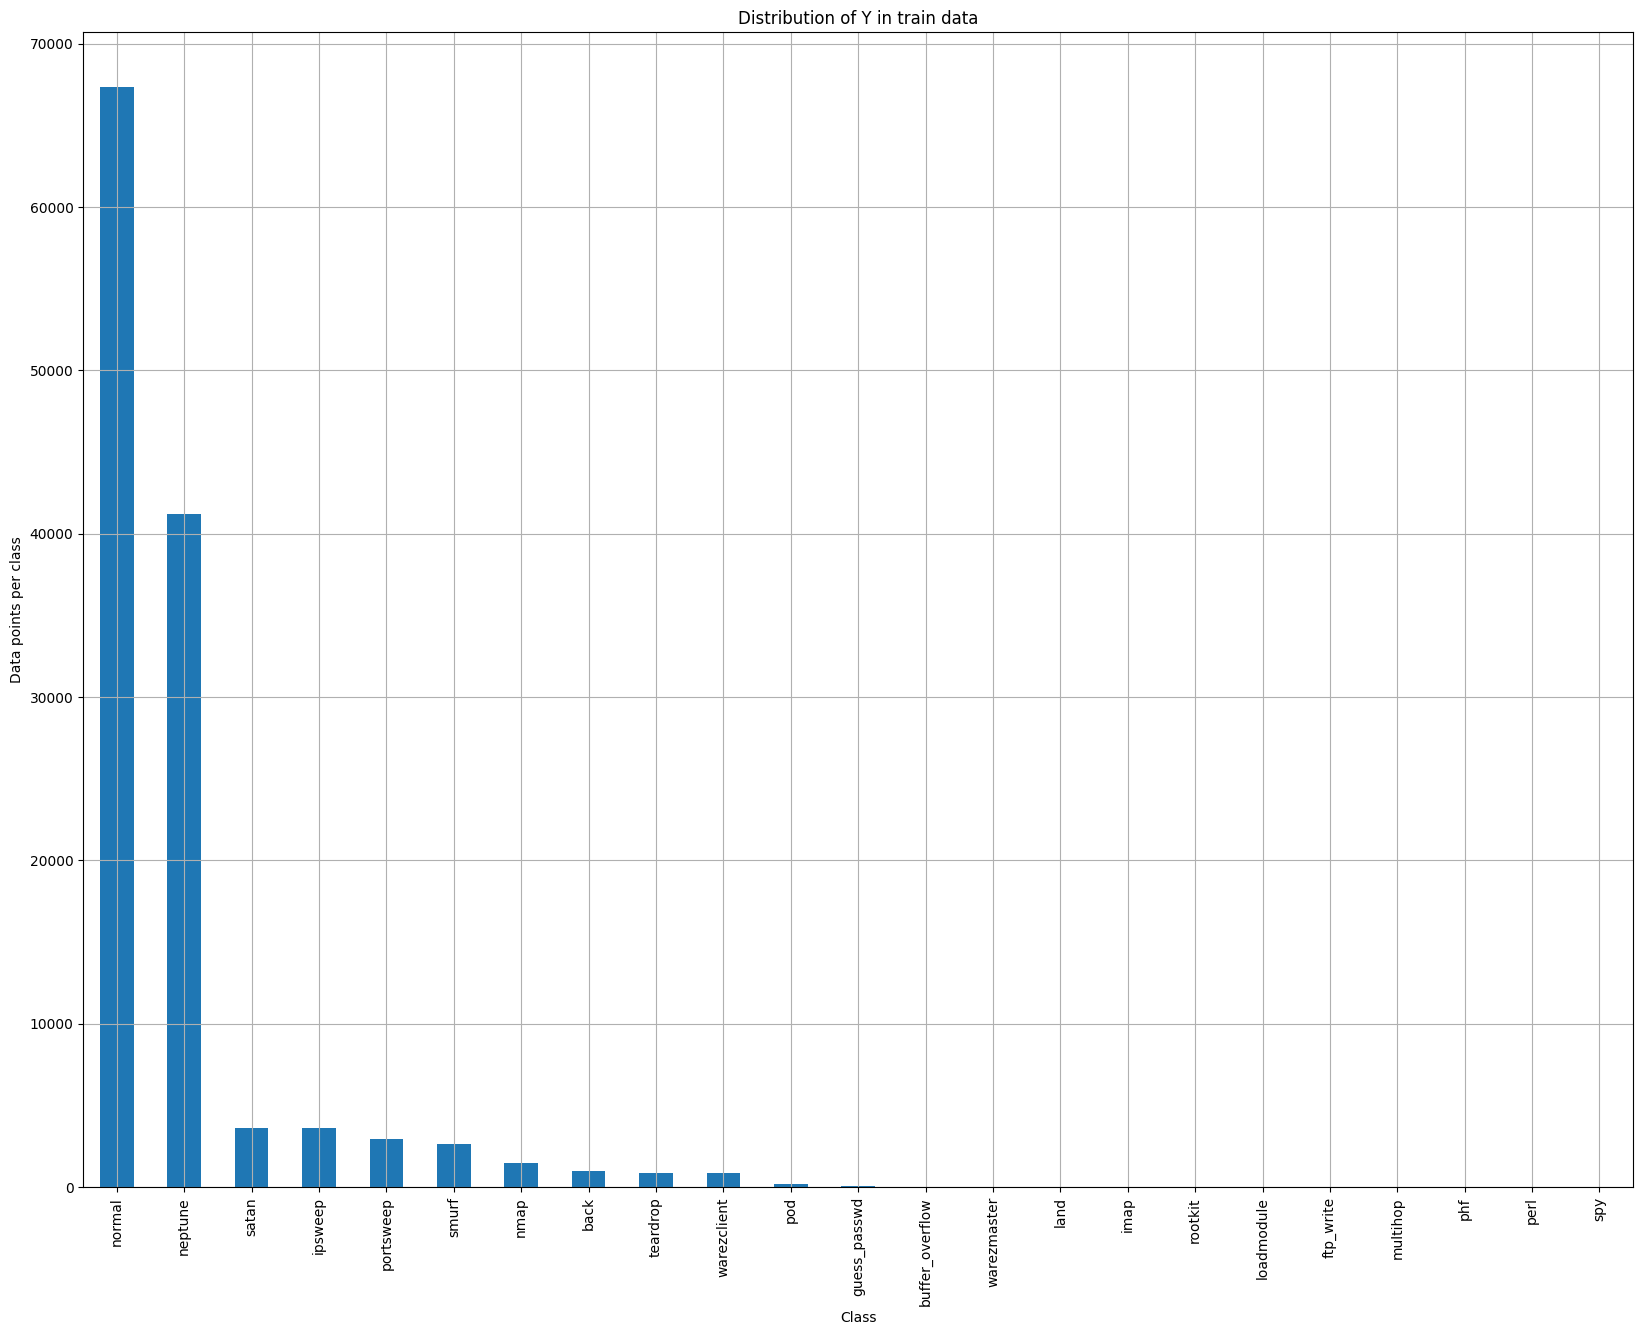

Number of data points in class dist 1 : 67343 ( 53.458 %)
Number of data points in class dist 2 : 41214 ( 32.717 %)
Number of data points in class dist 3 : 3633 ( 2.884 %)
Number of data points in class dist 4 : 3599 ( 2.857 %)
Number of data points in class dist 5 : 2931 ( 2.327 %)
Number of data points in class dist 6 : 2646 ( 2.1 %)
Number of data points in class dist 7 : 1493 ( 1.185 %)
Number of data points in class dist 8 : 956 ( 0.759 %)
Number of data points in class dist 9 : 892 ( 0.708 %)
Number of data points in class dist 10 : 890 ( 0.707 %)
Number of data points in class dist 11 : 201 ( 0.16 %)
Number of data points in class dist 12 : 53 ( 0.042 %)
Number of data points in class dist 13 : 30 ( 0.024 %)
Number of data points in class dist 14 : 20 ( 0.016 %)
Number of data points in class dist 15 : 18 ( 0.014 %)
Number of data points in class dist 16 : 11 ( 0.009 %)
Number of data points in class dist 17 : 10 ( 0.008 %)
Number of data points in class dist 18 : 9 ( 0.007 %)
N

In [57]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(20,15))
class_distribution = data['attack'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per class')
plt.title('Distribution of Y in train data')
plt.grid()
plt.show()
sort_y = np.argsort(-class_distribution.values)
for i in sort_y:
    print('Number of data points in class dist', i+1, ':',class_distribution.values[i], '(', np.round((class_distribution.values[i]/data.shape[0]*100), 3), '%)')

## One-Hot Encoding ##
Using the OneHotEncoder module changes categorical data to be represented as multiple columns of binary data, allowing the machine learning models to be more accurate

## Column Transformer ##
This appends the columns created by the OneHotEncoder into a data frame through the command: transformer.fit_transform()

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
x = data.drop(columns=['attack'])
one_hot = OneHotEncoder()
categorical_columns = ['protocol_type', 'service', 'flag']
transformer = ColumnTransformer([("one_hot",one_hot,
                                  categorical_columns)], 
                                remainder='passthrough')
df_encoded = transformer.fit_transform(x)

## StandardScaler ##
Scales the data for better processing and accuracy of the models

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(df_encoded)

## Principal Component Analysis ##
Principal Component Analysis (PCA) is a statistical technique which is used to reduce the amount of dimensions of raw data while preserving as much of the data's variability as possible.

In [82]:
from sklearn.decomposition import PCA
n_components = 10
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x)

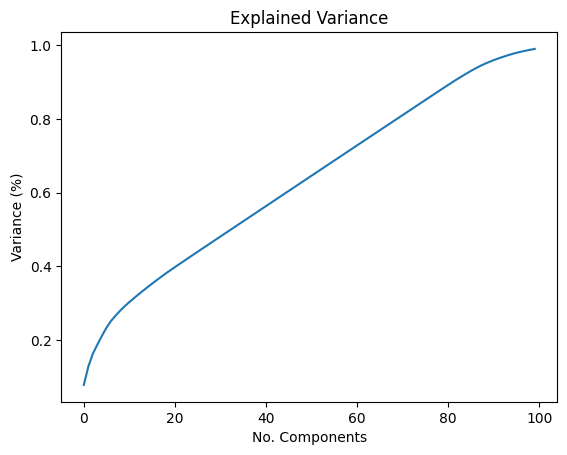

In [73]:
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [83]:
from sklearn.pipeline import Pipeline
n_neighbors = 10
pipeline = Pipeline([
    ('pca', PCA(n_components=n_components)),
    ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))])

It can be seen above that as the number of components increase, so does the variance

## Train ##
The x and y values are split and are now prepared to be used for model training

In [6]:
from sklearn.model_selection import train_test_split
y = (data['attack'] != 'normal')
x_train, x_val, y_train, y_val = train_test_split(x, y)

In [84]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [85]:
pipeline.score(x_val, y_val)

0.9976185940179082

## Weight of connection types ##
Due to the large disparity in raw data between normal and malicious connections (3:2), the minority must be increased so the models can more accurately identify malicious connections

In [7]:
data['is_malicious'] = (data['attack'] != 'normal').astype(int)
class_counts = data['is_malicious'].value_counts()
weight_for_false = class_counts.sum() / (2 * class_counts[0])
weight_for_true = class_counts.sum() / (2 * class_counts[1])

## Models Imported ##
The models are imported and declared under their respective names

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
RandomForestClassifier_Model = RandomForestClassifier(class_weight={0: weight_for_false, 1: weight_for_true})
KNeighborsClassifier_Model = KNeighborsClassifier()

In [106]:
rfc_pipeline = Pipeline([
    ('pca', PCA(n_components=n_components)),
    ('rfc', RandomForestClassifier(class_weight={0: weight_for_false, 1: weight_for_true}))])


In [107]:
rfc_pipeline.fit(x_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('rfc',
                 RandomForestClassifier(class_weight={0: 0.9353087923020953,
                                                      1: 1.0743049633293535}))])

In [108]:
rfc_pipeline.score(x_val, y_val)

0.9989204292881184

In [9]:
RandomForestClassifier_Model.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.9353087923020953,
                                     1: 1.0743049633293535})

In [10]:
KNeighborsClassifier_Model.fit(x_train, y_train)

KNeighborsClassifier()

Looking at the score of our models, it can be seen whether or not more pre-processing is required based on how accurate they are.

In [11]:
RandomForestClassifier_Model.score(x_val, y_val)

0.9997777354416715

In [60]:
KNeighborsClassifier_Model.score(x_val, y_val)

0.9982853876928939

## Exploring training results ##
By creating a confusion matrix, the accuracy of the models can be visually displayed for ease of understanding

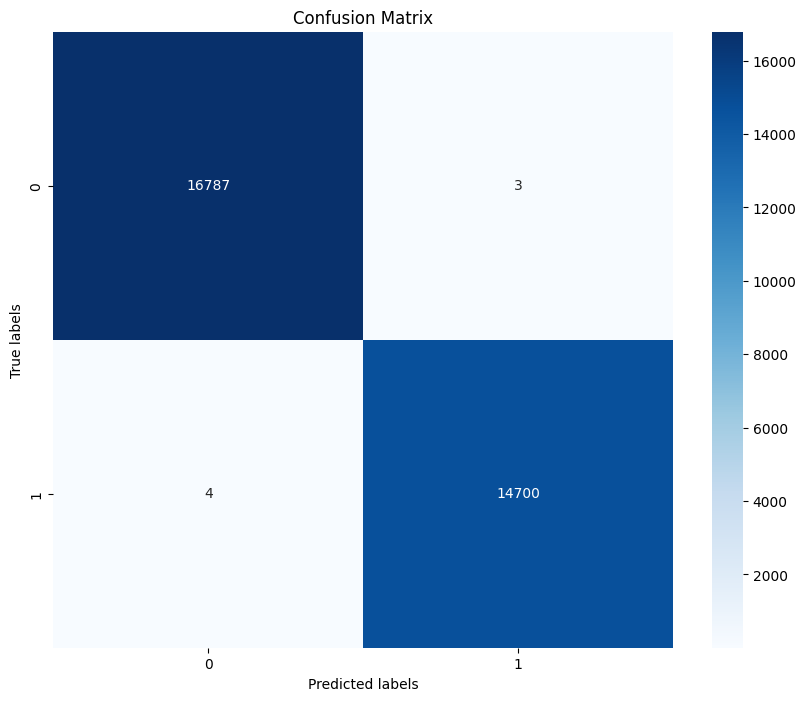

In [59]:
y_pred = RandomForestClassifier_Model.predict(x_val)
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

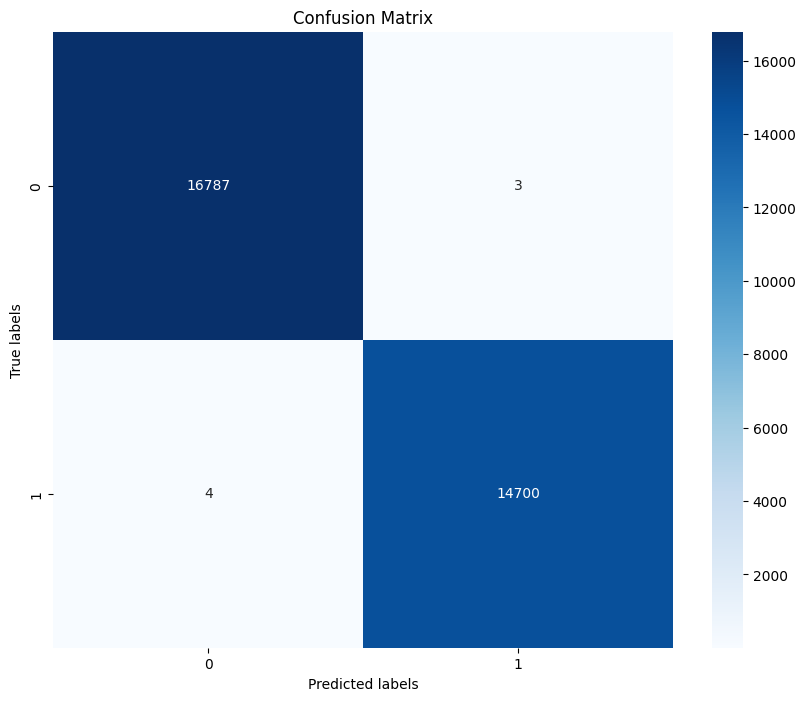

In [61]:
y_pred_2 = KNeighborsClassifier_Model.predict(x_val)
cm2 = confusion_matrix(y_val, y_pred_2)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Hyperparameter tuning ##
To increase the accuracy of the models, their hyperparameters can be tuned to increase/decrease sensitivity.
Using ccp_alpha prunes the trees created to reduce overfitting

In [44]:
rfc_hyperparam = {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20, 30], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4], "ccp_alpha": [0.015]}
gridsearch_rfc = GridSearchCV(estimator=RandomForestClassifier_Model, param_grid=rfc_hyperparam, cv=3, scoring="accuracy", n_jobs =-1)
gridsearch_rfc.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight={0: 0.9353087923020953,
                                                            1: 1.0743049633293535}),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.015, 0.02, 0.025],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [100]:
knn_hyperparam = {'pca__n_components': [25, 50, 75, 100], "knn__n_neighbors": [5, 10, 15], "knn__algorithm": ['auto'], "knn__leaf_size": [10, 20, 30], "knn__weights": ['uniform', 'distance']}
knn_grid_search = GridSearchCV(pipeline, knn_hyperparam, cv=3, scoring="accuracy", n_jobs=-1)
knn_grid_search.fit(x_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(n_components=10)),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=10))]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['auto'],
                         'knn__leaf_size': [10, 20, 30],
                         'knn__n_neighbors': [5, 10, 15],
                         'knn__weights': ['uniform', 'distance'],
                         'pca__n_components': [25, 50, 75, 100]},
             scoring='accuracy')

In [101]:
bestparameters_knn= knn_grid_search.best_params_
print("Best hyperparameter:", bestparameters_knn)
tuned_pipeline = knn_grid_search.best_estimator_
tuned_pipeline.score(x_val, y_val)

Best hyperparameter: {'knn__algorithm': 'auto', 'knn__leaf_size': 10, 'knn__n_neighbors': 5, 'knn__weights': 'distance', 'pca__n_components': 100}


0.9989839334476408

In [51]:
kn_hyperparam = {"n_neighbors": [5, 10, 15], "algorithm": ['auto'], "leaf_size": [10, 20, 30], "weights": ['uniform', 'distance']}
gridsearch_kn = GridSearchCV(estimator=KNeighborsClassifier_Model, param_grid=kn_hyperparam, cv=3, scoring="accuracy", n_jobs =-1)
gridsearch_kn.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto'], 'leaf_size': [10, 20, 30],
                         'n_neighbors': [5, 10, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [45]:
bestparameters_rfc = gridsearch_rfc.best_params_
print("Best hyperparameter:", bestparameters_rfc)
tuned_rfc_model = gridsearch_rfc.best_estimator_
tuned_rfc_model.score(x_val, y_val)

Best hyperparameter: {'ccp_alpha': 0.015, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


0.972693211405347

In [52]:
bestparameters_kn = gridsearch_kn.best_params_
print("Best hyperparameters:", bestparameters_kn)
tuned_kn_model = gridsearch_kn.best_estimator_
tuned_kn_model.score(x_val, y_val)

Best hyperparameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}


0.999015685527402

## Testing ##
The test data is now imported, and the models' accuracy is tested

In [37]:
column_names = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level']) #according to https://github.com/Wahch/projetIDS/blob/main/ProjetIDS.ipynb
test = pd.read_csv("KDDTest.txt", names=column_names)
test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [38]:
x_test = test.drop(columns=['attack'])
categorical_columns = ['protocol_type', 'service', 'flag']
df_encoded = transformer.transform(x_test)
x_test = scaler.transform(df_encoded)
y_test = (test['attack'] != 'normal')

Comparing the tuned and non-tuned versions show where more tuning is potentially required

In [47]:
RandomForestClassifier_Model.score(x_test, y_test)

0.7860184528034067

In [48]:
tuned_rfc_model.score(x_test,y_test)

0.7837562100780695

In [49]:
KNeighborsClassifier_Model.score(x_test, y_test)

0.7877484031227822

In [81]:
tuned_kn_model.score(x_test,y_test)

0.7885911994322214

In [109]:
rfc_pipeline.score(x_test, y_test)

0.8148509581263307

In [102]:
tuned_pipeline.score(x_test, y_test)

0.8092618878637331

## Examining Test Results ##
Having both achieved 80% and 79% respectively, the RandomForest and KNeighbours models created require more tuning

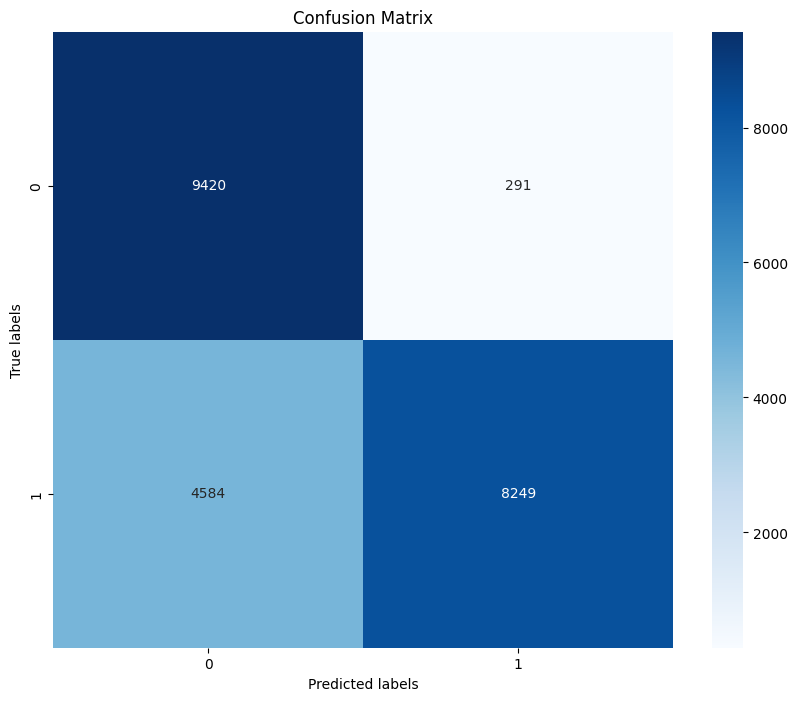

In [93]:
from sklearn.metrics import confusion_matrix
y_pred = tuned_rfc_model.predict(x_test)
rf_test_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(rf_test_cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

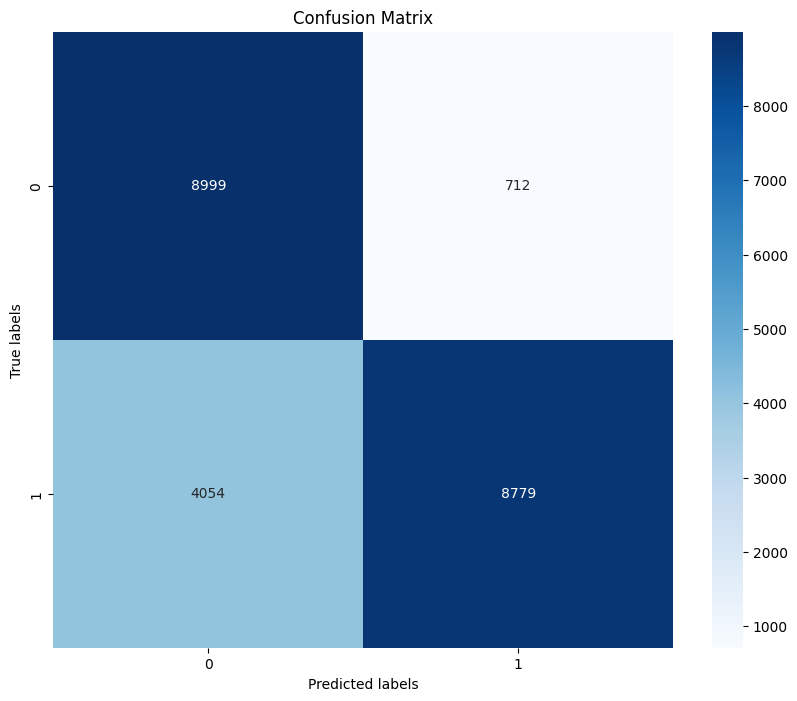

In [92]:
y_pred_2 = tuned_kn_model.predict(x_test)
kn_test_cm = confusion_matrix(y_test, y_pred_2)
plt.figure(figsize=(10,8))
sns.heatmap(kn_test_cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

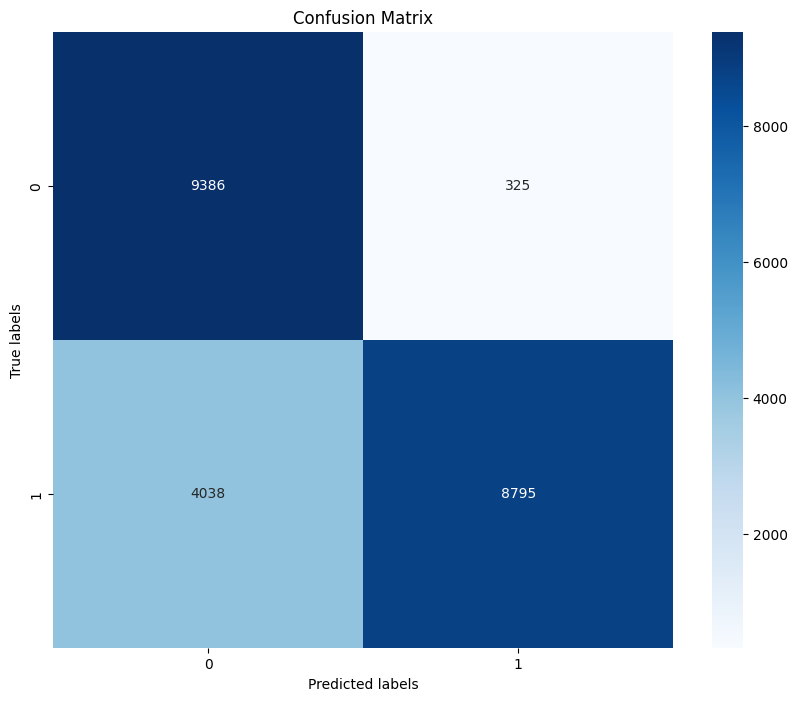

In [91]:
y_pred_3 = pipeline.predict(x_test)
cm_pipeline_test = confusion_matrix(y_test, y_pred_3)
plt.figure(figsize=(10,8))
sns.heatmap(cm_pipeline_test, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

As shown in the test results, both models incorrectly identify  a percentage of malicious connections as non-malicious. This inaccuracy could cause security incidents would these models be used in industry. In conclusion, these models require more tuning.